In [49]:
import pandas as pd

In [50]:
df = pd.read_csv('../../data/player_stat_team_stat_aggregate.csv')
df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,TOV_avg_5_OPP,TOV_avg_10_OPP,TOV_avg_15_OPP,TOV_avg_30_OPP,PF_avg_1_OPP,PF_avg_3_OPP,PF_avg_5_OPP,PF_avg_10_OPP,PF_avg_15_OPP,PF_avg_30_OPP
0,12200012,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,15.683333,...,16.6,15.222222,14.428571,14.000000,14.0,20.000000,22.0,21.777778,20.857143,19.758621
1,12200022,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,17.433333,...,15.6,13.555556,12.428571,12.758621,17.0,19.666667,21.0,21.666667,20.571429,20.241379
2,12200028,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,NaN,DNP - Coach's Decision,NaN,...,15.8,14.888889,14.857143,13.862069,16.0,20.333333,21.4,19.777778,18.571429,17.586207
3,12200040,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,NaN,DNP - Coach's Decision,NaN,...,17.8,17.500000,16.571429,15.586207,25.0,24.000000,23.6,23.200000,23.214286,22.068966
4,12200057,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,24.700000,...,15.6,15.000000,14.857143,13.931034,18.0,21.666667,22.0,21.777778,19.785714,18.137931


In [51]:
df.columns

Index(['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION', 'TEAM_CITY', 'PLAYER_ID',
       'PLAYER_NAME', 'NICKNAME', 'START_POSITION', 'COMMENT', 'MIN',
       ...
       'TOV_avg_5_OPP', 'TOV_avg_10_OPP', 'TOV_avg_15_OPP', 'TOV_avg_30_OPP',
       'PF_avg_1_OPP', 'PF_avg_3_OPP', 'PF_avg_5_OPP', 'PF_avg_10_OPP',
       'PF_avg_15_OPP', 'PF_avg_30_OPP'],
      dtype='object', length=407)

In [52]:
# Handeling missing data
# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage

GAME_ID              0.000000
TEAM_ID              0.000000
TEAM_ABBREVIATION    0.000000
TEAM_CITY            0.000000
PLAYER_ID            0.000000
                       ...   
PF_avg_3_OPP         0.043386
PF_avg_5_OPP         0.043386
PF_avg_10_OPP        0.043386
PF_avg_15_OPP        0.043386
PF_avg_30_OPP        0.043386
Length: 407, dtype: float64

In [53]:
df['START_POSITION'].unique()

array(['F', nan, 'C', 'G'], dtype=object)

In [54]:
df = df[df['COMMENT'].isnull()]
df.COMMENT.unique()

array([nan], dtype=object)

In [55]:
(df.isnull().sum() / len(df)) * 100

GAME_ID              0.000000
TEAM_ID              0.000000
TEAM_ABBREVIATION    0.000000
TEAM_CITY            0.000000
PLAYER_ID            0.000000
                       ...   
PF_avg_3_OPP         0.031744
PF_avg_5_OPP         0.031744
PF_avg_10_OPP        0.031744
PF_avg_15_OPP        0.031744
PF_avg_30_OPP        0.031744
Length: 407, dtype: float64

In [56]:
df['START_POSITION'] = df['START_POSITION'].fillna('NA')
# df['COMMENT'] = df['COMMENT'].fillna('NA')

In [57]:
# Ensure datetime columns are in datetime format
df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'])

In [58]:
# One-hot encode categorical columns
one_hot_start_position = pd.get_dummies(df['START_POSITION'], prefix='START_POSITION')
# one_hot_comment = pd.get_dummies(df['COMMENT'], prefix='COMMENT')
one_hot_team_abbreviation = pd.get_dummies(df['TEAM_ABBREVIATION'], prefix='TEAM_ABBREVIATION')
one_hot_team_opp = pd.get_dummies(df['TEAM_ABBREVIATION_OPP'], prefix='TEAM_ID_OPP')

# Add one-hot encoded features back to the original dataframe
df = pd.concat([df, one_hot_start_position, one_hot_team_abbreviation, one_hot_team_opp], axis=1)

In [59]:
df.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,...,TEAM_ID_OPP_OKC,TEAM_ID_OPP_ORL,TEAM_ID_OPP_PHI,TEAM_ID_OPP_PHX,TEAM_ID_OPP_POR,TEAM_ID_OPP_SAC,TEAM_ID_OPP_SAS,TEAM_ID_OPP_TOR,TEAM_ID_OPP_UTA,TEAM_ID_OPP_WAS
0,12200012,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,15.683333,...,False,False,False,False,False,True,False,False,False,False
1,12200022,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,17.433333,...,False,False,False,True,False,False,False,False,False,False
4,12200057,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,24.700000,...,False,False,False,False,False,False,False,False,False,False
5,12200070,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,17.783333,...,False,False,False,False,False,True,False,False,False,False
6,22200002,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,35.200000,...,False,False,False,False,False,False,False,False,False,False


In [60]:
# Exclude columns
exclude_columns = ['GAME_ID', 'TEAM_ID', 'TEAM_ABBREVIATION','TEAM_CITY','PLAYER_ID','PLAYER_NAME','NICKNAME','START_POSITION','COMMENT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A', 'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'STL', 'BLK', 'TO', 'PF', 'PTS', 'PLUS_MINUS', 'SEASON_ID', 'TEAM_ABBREVIATION_TEAM', 'TEAM_NAME', 'GAME_DATE_TEAM', 'MATCHUP', 'WL', 'MIN_TEAM', 'PTS_TEAM', 'FGM_TEAM', 'FGA_TEAM', 'FG_PCT_TEAM', 'FG3M_TEAM', 'FG3A_TEAM', 'FG3_PCT_TEAM', 'FTM_TEAM', 'FTA_TEAM', 'FT_PCT_TEAM', 'OREB_TEAM', 'DREB_TEAM', 'REB_TEAM', 'AST_TEAM', 'STL_TEAM', 'BLK_TEAM', 'TOV', 'PF_TEAM', 'PLUS_MINUS_TEAM' ,'SEASON_ID_OPP','TEAM_ID_OPP','TEAM_ABBREVIATION_OPP','TEAM_NAME_OPP','GAME_DATE_OPP','MATCHUP_OPP','WL_OPP','MIN_OPP','PTS_OPP','FGM_OPP','FGA_OPP','FG_PCT_OPP','FG3M_OPP','FG3A_OPP','FG3_PCT_OPP','FTM_OPP','FTA_OPP','FT_PCT_OPP','OREB_OPP','DREB_OPP','REB_OPP','AST_OPP','STL_OPP','BLK_OPP','TOV_OPP','PF_OPP','PLUS_MINUS_OPP', 'GAME_DATE']

In [61]:
# Drop the 'Comment' column from the DataFrame
df_cleaned = df.drop(columns=['COMMENT'])

# Drop rows with missing values
df_cleaned = df_cleaned.dropna()

In [62]:
# Train and test data split

# Sort dataframe by 'GAME_DATE'
df_cleaned = df_cleaned.sort_values('GAME_DATE')

df_cleaned.reset_index(drop=True, inplace=True)

# Calculate the index for the 80/20 split
total_samples = len(df_cleaned)
train_size = int(0.8 * total_samples)
train_end_index = train_size - 1

# Get the corresponding split date
split_date = df_cleaned.iloc[train_end_index]['GAME_DATE']

print("Approximate 80/20 split date:", split_date)

Approximate 80/20 split date: 2023-03-13 00:00:00


In [70]:
from torch.utils.data import Dataset, DataLoader


# Sort dataframe by 'GAME_DATE'
df_cleaned = df_cleaned.sort_values('GAME_DATE')

df_cleaned.reset_index(drop=True, inplace=True)

# Get indices for train and test sets
train_indices = df_cleaned.index[df_cleaned['GAME_DATE'] < split_date]
test_indices = df_cleaned.index[df_cleaned['GAME_DATE'] >= split_date]

# Convert dataframe to PyTorch tensors
numeric_columns = [col for col in df_cleaned.columns if col not in exclude_columns]
numeric_data = df_cleaned[numeric_columns].values.astype('float32')  # Convert to NumPy array with float32
features_tensor = torch.tensor(numeric_data, dtype=torch.float32)
target_tensor = torch.tensor(df_cleaned[['PTS', 'REB', 'AST']].values, dtype=torch.float32)

# Create custom Dataset class
class CustomDataset(Dataset):
    def __init__(self, features, targets, indices):
        self.features = features[indices]
        self.targets = targets[indices]

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        return self.features[idx], self.targets[idx]

# Create custom datasets for train and test sets
train_dataset = CustomDataset(features_tensor, target_tensor, train_indices)
test_dataset = CustomDataset(features_tensor, target_tensor, test_indices)

# Create DataLoaders for train and test sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Example of printing a batch from the training loader
for batch_X, batch_y in train_loader:
    print("Batch of features:")
    print(batch_X)
    print("Batch of target variables:")
    print(batch_y)
    break

Batch of features:
tensor([[ 2.1167,  6.2611,  8.6667,  ...,  0.0000,  0.0000,  0.0000],
        [26.5667, 27.5278, 31.5800,  ...,  1.0000,  0.0000,  0.0000],
        [17.6500, 17.7500, 16.2625,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [32.0667, 29.0167, 27.8292,  ...,  0.0000,  0.0000,  0.0000],
        [27.8667, 26.1500, 28.2300,  ...,  0.0000,  0.0000,  0.0000],
        [21.8167, 22.3056, 22.5067,  ...,  0.0000,  0.0000,  0.0000]])
Batch of target variables:
tensor([[ 0.,  0.,  0.],
        [ 5.,  6.,  2.],
        [ 5.,  4.,  0.],
        [14.,  3.,  1.],
        [ 3.,  3.,  0.],
        [ 9.,  4.,  4.],
        [12.,  0.,  4.],
        [34.,  5.,  4.],
        [ 3.,  2.,  0.],
        [ 2.,  1.,  1.],
        [25.,  6.,  3.],
        [ 0.,  2.,  1.],
        [24.,  3.,  4.],
        [10.,  2.,  2.],
        [10.,  5.,  4.],
        [11.,  0.,  3.],
        [ 4.,  3.,  2.],
        [ 4.,  1.,  0.],
        [ 9.,  1.,  1.],
        [ 0.,  2.,  3.],
        [ 7.,  1.,  

In [71]:
max_train_index = max(train_indices)
max_test_index = max(test_indices)
max_features_index = features_tensor.shape[0] - 1  # Since indices start from 0

print(f"Max index in train_indices: {max_train_index}")
print(f"Max index in test_indices: {max_test_index}")
print(f"Max index in features_tensor: {max_features_index}")

if max_train_index > max_features_index or max_test_index > max_features_index:
    print("Error: Invalid indices found in train_indices or test_indices.")
else:
    print("Indices appear to be valid.")

Max index in train_indices: 21841
Max index in test_indices: 27452
Max index in features_tensor: 27452
Indices appear to be valid.


In [72]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define a simple neural network model
class SimpleModel(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleModel, self).__init__()
        self.fc = nn.Linear(input_size, output_size)

    def forward(self, x):
        return self.fc(x)

# Instantiate the model
input_size = len(numeric_columns)  # Number of input features
output_size = 3  # Number of output classes (points, rebounds, assists)
model = SimpleModel(input_size, output_size)

# Define loss function and optimizer
criterion = nn.MSELoss()  # Mean Squared Error loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(train_loader)}")

print("Training finished!")

# Evaluate the model on the test set
model.eval()
total_loss = 0.0
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        total_loss += loss.item()

print(f"Test Loss: {total_loss / len(test_loader)}")


Epoch [1/10], Loss: 30.88312799166097
Epoch [2/10], Loss: 18.482964427020853
Epoch [3/10], Loss: 17.510562137140187
Epoch [4/10], Loss: 17.61666224746369
Epoch [5/10], Loss: 17.122843592268133
Epoch [6/10], Loss: 17.175876715172787
Epoch [7/10], Loss: 17.447681185441695
Epoch [8/10], Loss: 17.4224312839536
Epoch [9/10], Loss: 16.835075802195647
Epoch [10/10], Loss: 16.92219003856095
Training finished!
Test Loss: 17.65356800772927


In [73]:
# Lists to store predicted and actual target values
predicted_values = []
actual_values = []

# Iterate through the test dataset
for batch_X, batch_y in test_loader:
    # Forward pass to get predictions
    with torch.no_grad():
        predictions = model(batch_X)

    # Append predicted and actual values to lists
    predicted_values.append(predictions)
    actual_values.append(batch_y)

# Concatenate the lists to get the final arrays
predicted_values = torch.cat(predicted_values)
actual_values = torch.cat(actual_values)

# Calculate evaluation metrics
mse = nn.MSELoss()(predicted_values, actual_values).item()
rmse = torch.sqrt(torch.tensor(mse)).item()
mae = nn.L1Loss()(predicted_values, actual_values).item()

# Print the evaluation metrics
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("Mean Absolute Error:", mae)

Mean Squared Error: 17.66999626159668
Root Mean Squared Error: 4.203569412231445
Mean Absolute Error: 2.895392417907715


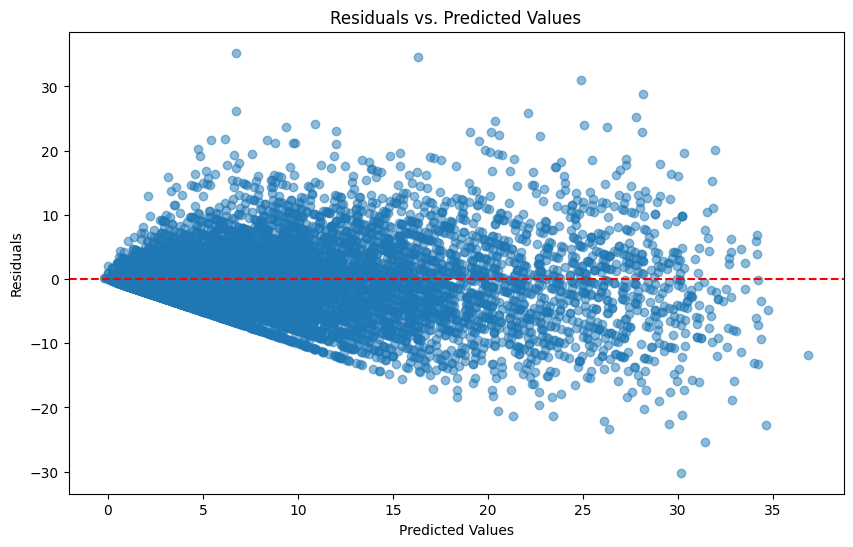

In [74]:
import matplotlib.pyplot as plt

# Evaluate model on test data
model.eval()
all_outputs = []
all_residuals = []

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        outputs = model(batch_X)
        batch_residuals = batch_y - outputs
        all_outputs.append(outputs)
        all_residuals.append(batch_residuals)

# Combine outputs and residuals from different batches into single tensors
all_outputs = torch.cat(all_outputs, dim=0)
all_residuals = torch.cat(all_residuals, dim=0)

# Plot residuals
plt.figure(figsize=(10, 6))
plt.scatter(all_outputs.numpy(), all_residuals.numpy(), alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

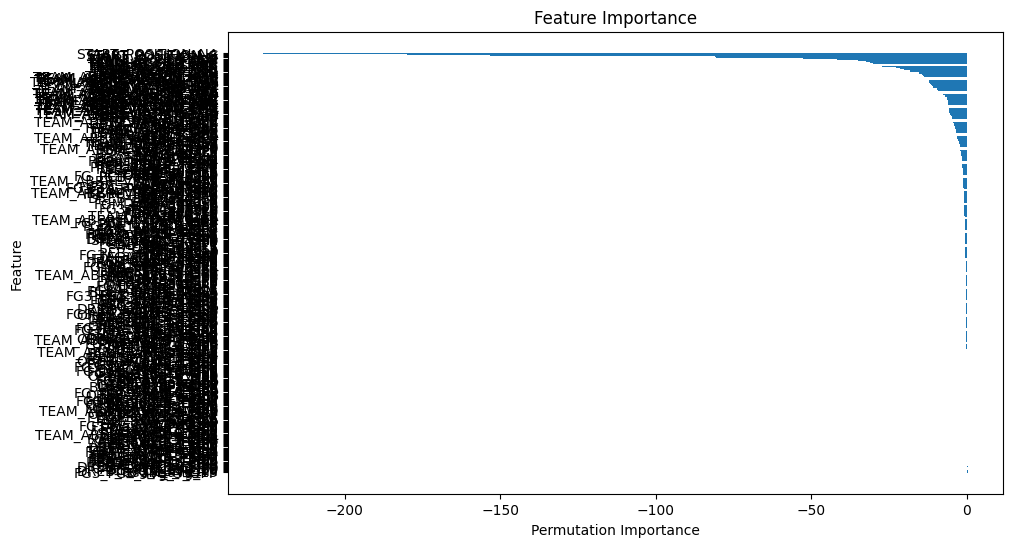

In [75]:
import torch
from sklearn.metrics import mean_squared_error
import numpy as np

# Set your model, criterion, and dataloaders here
# model = ...
# test_loader = ...

def calculate_permutation_importance(model, test_loader, criterion):
    model.eval()
    baseline_loss = 0.0

    with torch.no_grad():
        for batch_X, batch_y in test_loader:
            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            baseline_loss += loss.item()

    baseline_loss /= len(test_loader)

    feature_importance = []

    for feature_idx in range(len(numeric_columns)):  # Replace with the number of your features
        shuffled_losses = []

        for batch_X, batch_y in test_loader:
            original_values = batch_X[:, feature_idx].clone()
            shuffled_values = torch.randperm(len(batch_X))
            batch_X[:, feature_idx] = shuffled_values

            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            shuffled_losses.append(loss.item())

            batch_X[:, feature_idx] = original_values

        feature_importance.append(baseline_loss - np.mean(shuffled_losses))

    return feature_importance

feature_importance = calculate_permutation_importance(model, test_loader, criterion)

# Now you can visualize the feature importance using a bar plot
import matplotlib.pyplot as plt

sorted_idx = np.argsort(feature_importance)[::-1]
sorted_importance = np.array(feature_importance)[sorted_idx]
sorted_columns = [numeric_columns[idx] for idx in sorted_idx]

plt.figure(figsize=(10, 6))
plt.barh(sorted_columns, sorted_importance)
plt.xlabel('Permutation Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [76]:
import torch
import torch.nn as nn

# Define your model, test data, and target values here
# model = ...
# test_loader = ...
# target_values = ...

# Set the model to evaluation mode
model.eval()

# Initialize variables for total squared sum of residuals and total sum of squares
total_squared_residuals = 0
total_sum_squares = 0

# Calculate the R-squared value for each output separately
for batch_X, batch_y in test_loader:
    with torch.no_grad():
        outputs = model(batch_X)

    # Calculate the squared sum of residuals for each output
    squared_residuals = torch.sum((outputs - batch_y) ** 2, dim=0)
    total_squared_residuals += squared_residuals

    # Calculate the sum of squares for each output
    sum_squares = torch.sum((batch_y - torch.mean(batch_y, dim=0)) ** 2, dim=0)
    total_sum_squares += sum_squares

# Calculate R-squared value for each output
r_squared_values = 1 - total_squared_residuals / total_sum_squares

# Print R-squared values for each output
for i, r_squared in enumerate(r_squared_values):
    print(f"R-squared for output {i + 1}: {r_squared.item()}")

# Calculate and print the average R-squared value across all outputs
avg_r_squared = torch.mean(r_squared_values)
print(f"Average R-squared across all outputs: {avg_r_squared.item()}")


R-squared for output 1: 0.5009900331497192
R-squared for output 2: 0.42012667655944824
R-squared for output 3: 0.44230085611343384
Average R-squared across all outputs: 0.45447254180908203
